<Figure size 1000x600 with 0 Axes>

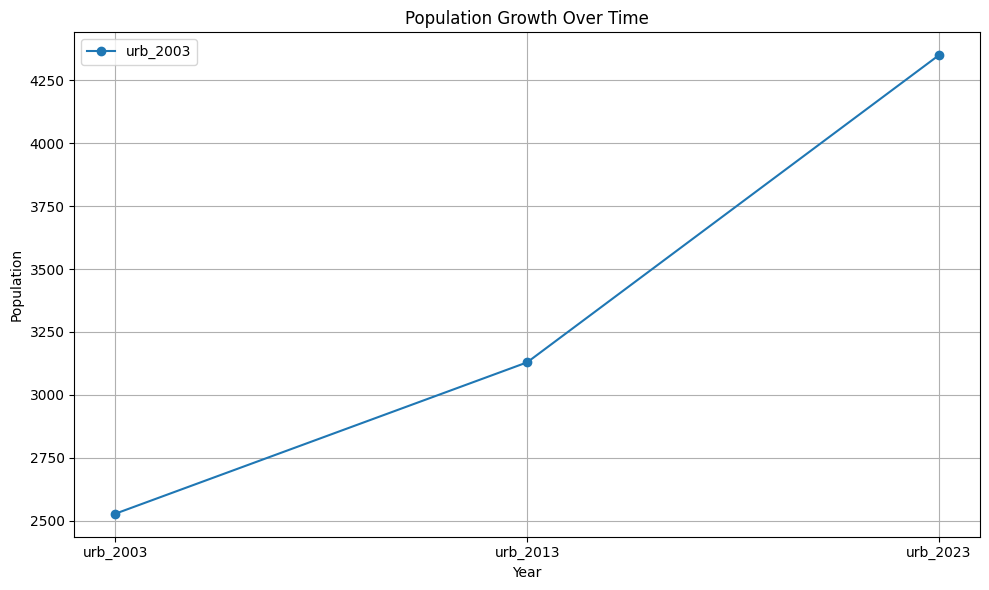

<Figure size 1000x600 with 0 Axes>

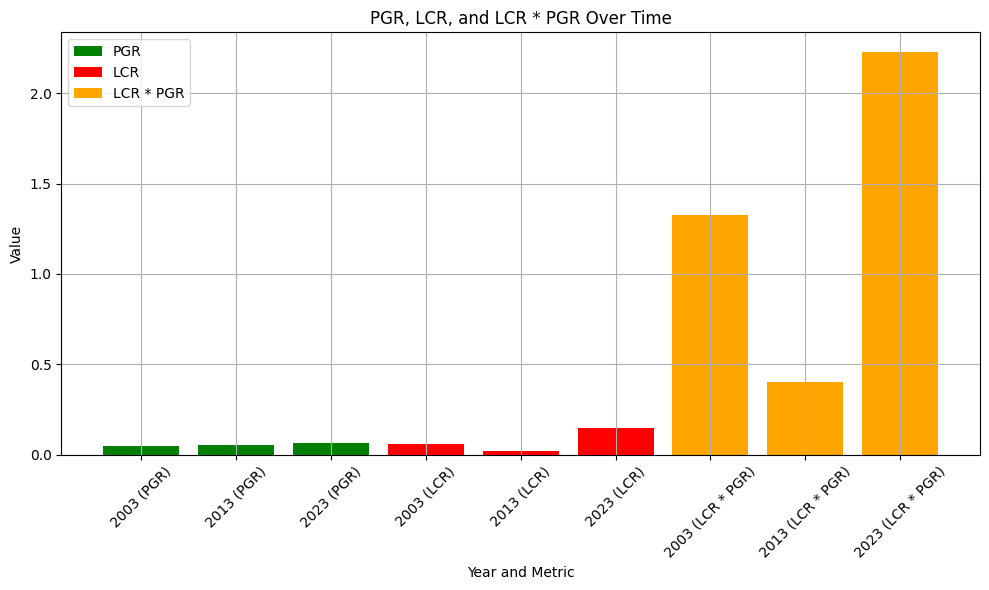

In [17]:
import folium
from folium.plugins import LocateControl
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

# Create a map object centered around a location
mymap = folium.Map(location=[13.332465, -16.701183], zoom_start=12.0)

# Add base maps
folium.TileLayer('cartodbdark_matter').add_to(mymap)  # Black base map
folium.TileLayer('cartodbpositron').add_to(mymap)     # Black and white base map
folium.TileLayer('openstreetmap').add_to(mymap)       # OpenStreetMap base map

# Define the GeoServer WMS URL
wms_url = 'http://localhost:8085/geoserver/mastersthesis_2023/wms'

# Define the layer names and corresponding titles for the layer switcher
layer_info = [
    ('mastersthesis_2023:gba_dataset', 'gba_dataset'),
    ('mastersthesis_2023:gba_lcr_1983_1993', 'Built-up Area 1983-1993'),
    ('mastersthesis_2023:gba_lcr_1993_2003', 'Built-up Area 1993-2003'),
    ('mastersthesis_2023:gba_lcr_2003_2013', 'Built-up Area 2003-2013'),
    ('mastersthesis_2023:gba_lcr_2013_2023', 'Built-up Area 2013-2023'),
]

# Add each WMS layer to the map with popups
for layer_name, title in layer_info:
    wms_layer = folium.raster_layers.WmsTileLayer(
        url=wms_url,
        layers=layer_name,
        fmt='image/png',
        transparent=True,
        overlay=True,
        name=title,  # Set the title for the layer switcher
    )
    wms_layer.add_to(mymap)
    folium.Marker(
        location=[13.332465, -16.701183],
        popup=f'Information about {title}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Add the new layer as a base map
new_layer = folium.raster_layers.TileLayer(
    tiles=wms_url,
    attr='Your Layer Attribution',  # Attribution for the new layer
    name='Your Layer Title',         # Title for the new layer
    overlay=False,
    control=True,
)
new_layer.add_to(mymap)

# Add legend with colors matching the map layers
legend_html = """
<div style="position: fixed; bottom: 10px; right: 10px; z-index: 1000; background-color: white; padding: 10px; border-radius: 5px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.2);">
    <h3>Legend</h3>
    <p><strong>Built-up Area 1983-1993</strong>: <span style="background-color: #ff0000; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p>
    <p><strong>Built-up Area 1993-2003</strong>: <span style="background-color: #00ff00; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p>
    <p><strong>Built-up Area 2003-2013</strong>: <span style="background-color: #0000ff; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p>
    <p><strong>Built-up Area 2013-2023</strong>: <span style="background-color: #ffff00; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p>
    <p><strong>Built-up Area 2017-2018</strong>: <span style="background-color: #ff00ff; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p>
    <p><strong>Your Layer Title</strong>: <span style="background-color: #00ffff; padding: 2px 8px; border-radius: 3px; color: white;">Legend content for this layer</span></p> <!-- Add legend for the new layer -->
</div>
"""

# Add the legend HTML to the map
mymap.get_root().html.add_child(folium.Element(legend_html))

# Add GPS tool to the map
LocateControl(auto_start=False).add_to(mymap)

# Display the map
display(mymap)

# Fetch data and store it in a DataFrame
data = {
    "fid": ["gba_dataset.3"],
    "gid": [5],
    "district": ["Kombo South"],
    "shape_leng": [127488.412258],
    "shape_area": [2.78041091834E8],
    "urb_2003": [2527.8],
    "urb_2013": [3129.3],
    "urb_2023": [4350.0],
    "pop_2003": [62531.0],
    "pop_2013": [106780.0],
    "pop_2023": [205686.0],
    "pgr_2003": [0.0454],
    "pgr_2013": [0.0535],
    "pgr_2023": [0.0656],
    "lcr_2003": [0.06],
    "lcr_2013": [0.021],
    "lcr_2023": [0.146],
    "lcrpgr2003": [1.328],
    "lcrpgr2013": [0.399],
    "lcrpgr2023": [2.226],
    "comps_2003": [3780.0],
    "comps_2013": [5447.0],
    "comps_2023": [10011.0],
    "c_dens2003": [3.0],
    "c_dens2013": [2.0],
    "c_dens2023": [3.0],
    "%chang2003": [44.1],
    "%chang2013": [83.8],
    "%chang2023": [86.5],
    "blds_2003": [9214.0],
    "blds_2013": [14890.0],
    "blds_2023": [22024.0],
    "b_dens2003": [7.0],
    "b_dens2013": [6.0],
    "b_dens2023": [7.0],
    "%chnge2003": [61.6],
    "%chnge2013": [48.0],
    "%chnge2023": [15.0],
    "area_ha": [29230.0],
    "den2003_ha": [25.0],
    "den2013_ha": [34.0],
    "den2023_ha": [15.0]
}

df = pd.DataFrame(data)

# Plot graphs and charts
plt.figure(figsize=(10, 6))

# Plot simplified graphs
plt.figure(figsize=(10, 6))

# Example: Plotting population growth over time
plt.plot(df.columns[5:8], df.iloc[0, 5:8], marker='o')
plt.title("Population Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.legend(df.columns[5:8])

plt.tight_layout()
plt.show()

# Plot bar chart for population growth over time
plt.figure(figsize=(10, 6))


# Define the data
years = ["2003", "2013", "2023"]
pgr = [0.0454, 0.0535, 0.0656]
lcr = [0.06, 0.021, 0.146]
lcrpgr = [1.328, 0.399, 2.226]

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for population growth rate
plt.bar([year + " (PGR)" for year in years], pgr, color='green', label='PGR')

# Plot bars for land cover ratio
plt.bar([year + " (LCR)" for year in years], lcr, color='red', label='LCR')

# Plot bars for land cover ratio multiplied by population growth rate
plt.bar([year + " (LCR * PGR)" for year in years], lcrpgr, color='orange', label='LCR * PGR')

# Customize the plot
plt.title("PGR, LCR, and LCR * PGR Over Time")
plt.xlabel("Year and Metric")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


